In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [2]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class MyLogisticRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    def fit(self, x, y, learning_rate=0.001, num_epochs=1000):
        self.coef_ = np.zeros(len(x[0]) + 1)  # Initialize coefficients with zeros
        for epoch in range(num_epochs):
            for i in range(len(x)):  # For each sample from the training data
                y_predicted = self.sigmoid(self.eval(x[i]))  # Compute the predicted output
                error = y_predicted - y[i]  # Compute the error for the current sample
                for j in range(len(x[0])):  # Update the coefficients
                    self.coef_[j] -= learning_rate * error * x[i][j]
                self.coef_[-1] -= learning_rate * error  # Update the intercept
        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def eval(self, xi):
        z = self.intercept_
        for j in range(len(xi)):
            z += self.coef_[j] * xi[j]
        return z

    def predict_proba(self, x):
        probabilities = [self.sigmoid(self.eval(xi)) for xi in x]
        return probabilities

    def predict(self, x, threshold=0.7):
        probabilities = self.predict_proba(x)
        predictions = [1 if p >= threshold else 0 for p in probabilities]
        return predictions

In [4]:
class MyLogisticRegressionMultiClass:
    def __init__(self, learning_rate=0.001, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.models = []  # Lista de modele pentru fiecare clasă

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def dot(self, X, W):
        return [sum(x * w) for x, w in zip(X, W)]

    def fit(self, X, y):
        num_classes = len(set(y))
        for i in range(num_classes):
            # Antrenăm un model de regresie logistică binară pentru fiecare clasă
            model = MyLogisticRegression()
            y_binary = [1 if label == i else 0 for label in y]  # Transformăm clasa curentă în 1 și toate celelalte clase în 0
            model.fit(X, y_binary)
            self.models.append(model)

    def predict_proba(self, X):
        probabilities = []
        for model in self.models:
            probabilities.append(model.predict_proba(X))
        return probabilities

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return [max(enumerate(probs), key=lambda x: x[1])[0] for probs in zip(*probabilities)]


In [5]:
def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariables = [dataNames.index(inputVariabNames[i]) for i in range(len(inputVariabNames))]
    print(len(data[i]) for i in range(len(data)))
    inputs = [[float(data[i][selectedVariable]) for selectedVariable in selectedVariables] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [data[i][selectedOutput] for i in range(len(data))]
    
    set_outputs = set(outputs)
    dict_outputs = {}
    i = 0
    for o in set_outputs:
        dict_outputs[o] = i
        i+= 1
    
    outputs = [dict_outputs[o] for o in outputs]
    
    return inputs, outputs

In [9]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'iris.data')
inputs, outputs = loadData(filePath, ['sepal_length','sepal_width','petal_length','petal_width'], 'iris_type')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

<generator object loadData.<locals>.<genexpr> at 0x000001E7BADB12A0>
in:   [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2]]
out:  [0, 0, 0, 0, 0]


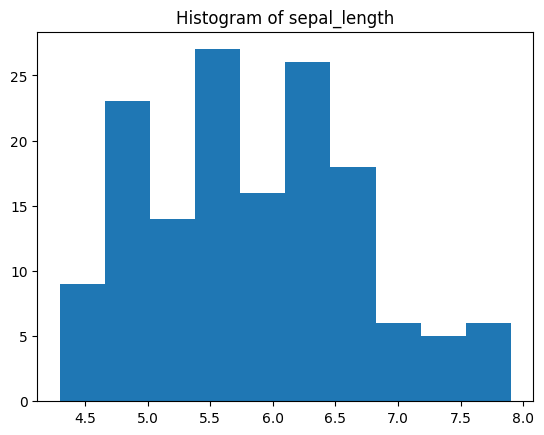

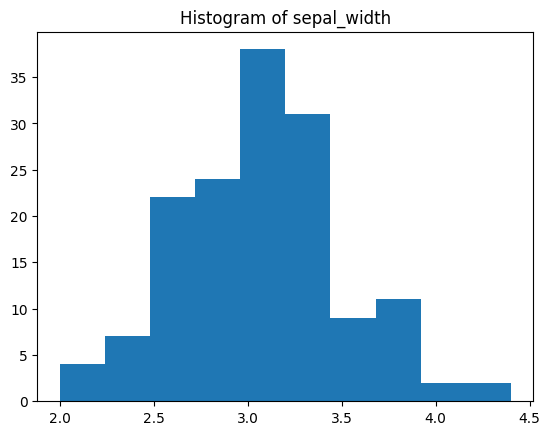

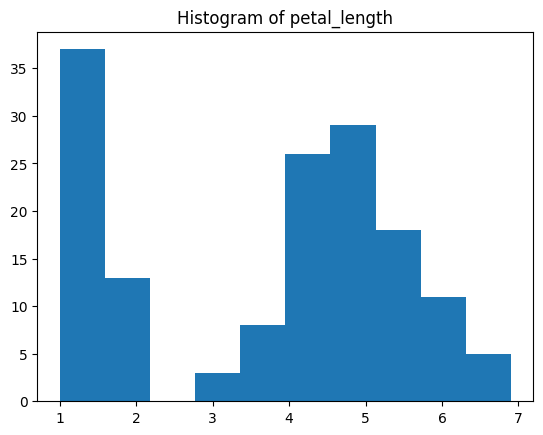

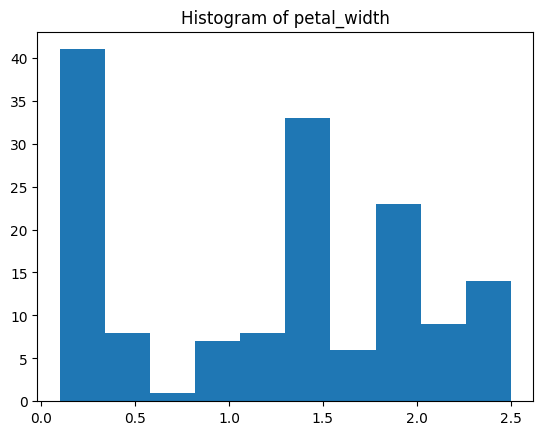

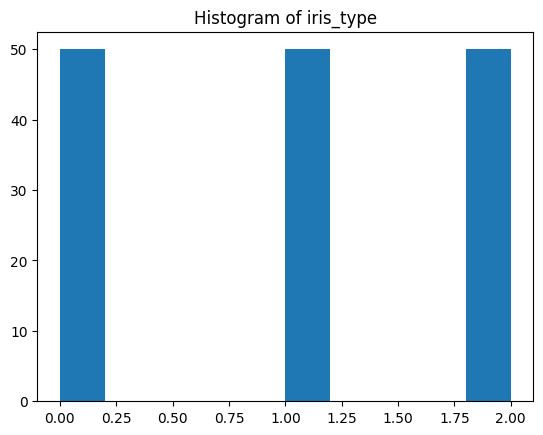

In [10]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram([inputs[i][0] for i in range(len(inputs))], 'sepal_length')
plotDataHistogram([inputs[i][1] for i in range(len(inputs))], 'sepal_width')
plotDataHistogram([inputs[i][2] for i in range(len(inputs))], 'petal_length')
plotDataHistogram([inputs[i][3] for i in range(len(inputs))], 'petal_width')
plotDataHistogram(outputs, 'iris_type')

In [11]:
def normalisation(trainData, testData):
    for i in range(len(trainData[0])):
        trainData[i] = (trainData[i] - np.min(trainData[i])) / (np.max(trainData[i]) - np.min(trainData[i]))
        testData[i] = (testData[i] - np.min(trainData[i])) / (np.max(trainData[i]) - np.min(trainData[i]))
    return trainData, testData

In [12]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs1, testInputs = normalisation(trainInputs, testInputs)


testInputsNP = np.array(testInputs)
testOutputsNP = np.array(testOutputs)
trainInputsNP = np.array(trainInputs)
trainOutputsNP = np.array(trainOutputs)

# 
# plotDataHistogram([trainInputs[i][0] for i in range(len(trainInputs))], 'sepal_length_after_normalization')
# plotDataHistogram([trainInputs[i][1] for i in range(len(trainInputs))], 'sepal_width_after_normalization')
# plotDataHistogram([trainInputs[i][2] for i in range(len(trainInputs))], 'petal_length_after_normalization')
# plotDataHistogram([trainInputs[i][3] for i in range(len(trainInputs))], 'petal_width_after_normalization')

In [19]:
from sklearn.linear_model import LogisticRegression

# Inițializează modelul
# regressor = MyLogisticRegressionMultiClass()
# regressor.fit(trainInputs, trainOutputs)
# computedTestOutputs = regressor.predict(testInputs)



# Tool
regressor = LogisticRegression()
regressor.fit(trainInputs,  trainOutputs)
computedTestOutputs = regressor.predict(testInputs)

In [20]:
from sklearn.metrics import accuracy_score

acc = sum([1 if testOutputs[i] == computedTestOutputs[i] else 0 for i in range(0, len(testOutputs))]) / len(testOutputs)
print('prediction error (manual): ', acc)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = accuracy_score(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)


prediction error (manual):  1.0
prediction error (tool):   1.0
